## IMPORT LIBRARIES

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [236]:
car_data=pd.read_csv('C:/Users/manoj/Task/cars_price.csv')

In [6]:
car_data.head()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [7]:
car_data.dtypes

Unnamed: 0               int64
make                    object
model                   object
priceUSD                 int64
year                     int64
condition               object
mileage(kilometers)    float64
fuel_type               object
volume(cm3)            float64
color                   object
transmission            object
drive_unit              object
segment                 object
dtype: object

In [8]:
car_data.describe()

,Unnamed: 0,priceUSD,year,mileage(kilometers),volume(cm3)
count,40000.00000,40000.000000,40000.000000,4.000000e+04,39970.000000
mean,19999.50000,7430.383775,2003.485625,2.434332e+05,2103.201676
std,11547.14972,8338.242134,8.114896,3.167033e+05,938.724653
min,0.00000,95.000000,1938.000000,0.000000e+00,500.000000
25%,9999.75000,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,19999.50000,5350.000000,2004.000000,2.280000e+05,1995.000000
75%,29999.25000,9850.000000,2010.000000,3.087610e+05,2300.000000
max,39999.00000,195000.000000,2019.000000,9.999999e+06,20000.000000


In [9]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           40000 non-null  int64  
 1   make                 40000 non-null  object 
 2   model                40000 non-null  object 
 3   priceUSD             40000 non-null  int64  
 4   year                 40000 non-null  int64  
 5   condition            40000 non-null  object 
 6   mileage(kilometers)  40000 non-null  float64
 7   fuel_type            40000 non-null  object 
 8   volume(cm3)          39970 non-null  float64
 9   color                40000 non-null  object 
 10  transmission         40000 non-null  object 
 11  drive_unit           38655 non-null  object 
 12  segment              36245 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 4.0+ MB


## DATA VISUALIZATION

the priceUSD is right skewed

C:\Users\manoj\anaconda3\envs\test_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='priceUSD', ylabel='Density'>

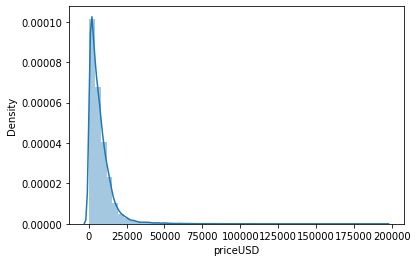

In [17]:
sns.distplot(car_data['priceUSD'])

As the year increased price also increased,but towards the end of the year there is a decrease in price

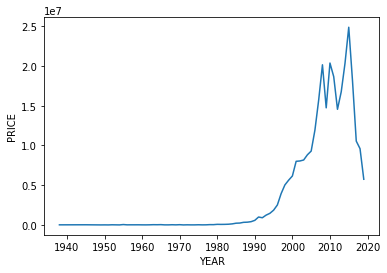

In [10]:
car_data.groupby(['year']).sum()['priceUSD'].plot()
plt.xlabel('YEAR')
plt.ylabel('PRICE')
plt.show()

In [13]:
car_data['fuel_type'].value_counts()

petrol        25869
diesel        14101
electrocar       30
Name: fuel_type, dtype: int64

C:\Users\manoj\anaconda3\envs\test_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='fuel_type', ylabel='count'>

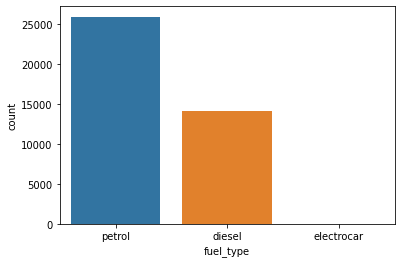

In [16]:
sns.countplot(car_data['fuel_type'])

In [31]:
car_data['make'].value_counts()

volkswagen      4943
audi            2849
bmw             2839
opel            2662
renault         2650
                ... 
jac                1
aston-martin       1
saipa              1
bogdan             1
byd                1
Name: make, Length: 93, dtype: int64

In [21]:
car_data['model'].unique()

array(['accord', 'fusion', 'teana', 'fox', 'primera', 'x-trail', 'galant',
       'golf', 'passat', 'vel-satis', 'a6', 'matiz', 'land-cruiser',
       'outlander', 'vectra', 'zafira', 'megane', 'lacetti', 'laguna',
       'sharan', 'c-klass', 'rx', '7-seriya', '80', '5-seriya', 'omega',
       '21', 'xc70', 'epica', 'multivan', 'lancer', 'xj', 'fusion-usa',
       'grand-vitara', 'clio', 'vesta', 'santa-fe', 'xc90', 's-klass',
       'e-klass', 'c8', 'previa', '166', 'swift', 'b-klass', 'mpv',
       'patrol', 'c4-grand-picasso', 'rc', 's80', 'range-rover',
       '3-seriya', 'touareg', '9-5', 'bluebird', 'touran', 'meriva',
       'focus', '69', 'fit', 'soul', 'transporter', '626', '3', 'clarus',
       'mokka', 'a4', 'viano', 'carisma', 'xsara', 'c3-picasso', 'civic',
       'musso', 'emgrand-x7', 'astra', 'accent', 'duster', 'marea', '308',
       '100', 'c-max', '19', '306', 'sunny', '323', 'i40', 'shuma',
       'hiace', 'q3', 'pajero', 'palio', 'c4', 'explorer', 'passat-cc',
    

C:\Users\manoj\anaconda3\envs\test_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3]),
 [Text(0, 0, 'front-wheel drive'),
  Text(1, 0, 'all-wheel drive'),
  Text(2, 0, 'part-time four-wheel drive'),
  Text(3, 0, 'rear drive')])

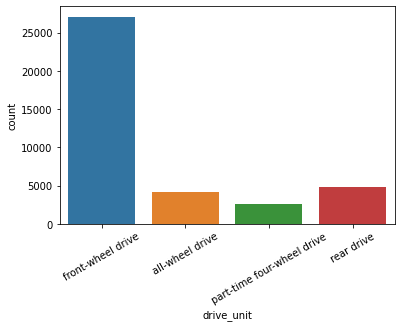

In [40]:
sns.countplot(car_data['drive_unit'])
plt.xticks(rotation=30)

In [42]:
car_data.columns

Index(['Unnamed: 0', 'make', 'model', 'priceUSD', 'year', 'condition',
       'mileage(kilometers)', 'fuel_type', 'volume(cm3)', 'color',
       'transmission', 'drive_unit', 'segment'],
      dtype='object')

<AxesSubplot:xlabel='volume(cm3)', ylabel='priceUSD'>

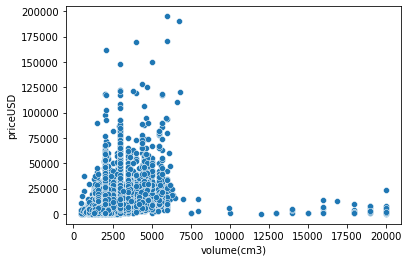

In [129]:
sns.scatterplot(y='priceUSD',x='volume(cm3)',data=car_data)

In [56]:
car_data['condition'].value_counts()

with mileage    39337
with damage       341
for parts         322
Name: condition, dtype: int64

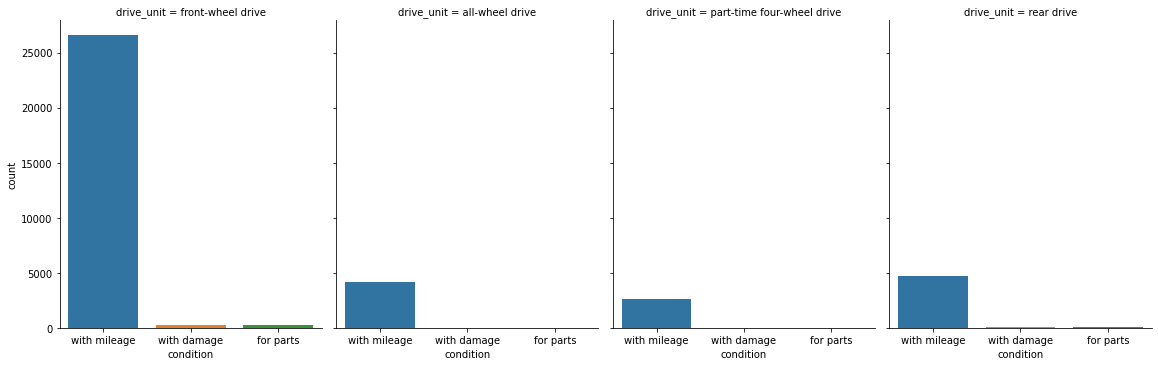

In [58]:
sns.catplot(x="condition", col="drive_unit", col_wrap=4,data=car_data,kind="count", height=5, aspect=.8)

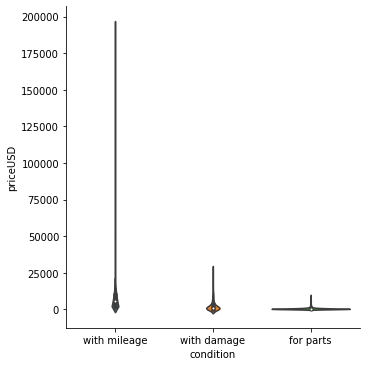

In [66]:
sns.catplot(x="condition", y="priceUSD",data=car_data, kind="violin")

In [69]:
car_data.head()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


C:\Users\manoj\anaconda3\envs\test_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='transmission', ylabel='count'>

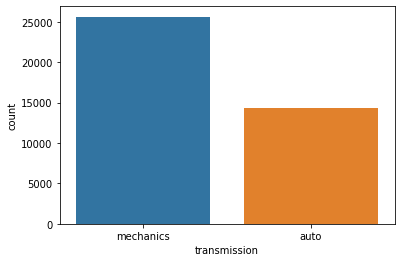

In [73]:
sns.countplot(car_data['transmission'])

In [79]:
car_data.isna().any()

Unnamed: 0             False
make                   False
model                  False
priceUSD               False
year                   False
condition              False
mileage(kilometers)    False
fuel_type              False
volume(cm3)             True
color                  False
transmission           False
drive_unit              True
segment                 True
dtype: bool

C:\Users\manoj\anaconda3\envs\test_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='volume(cm3)', ylabel='Density'>

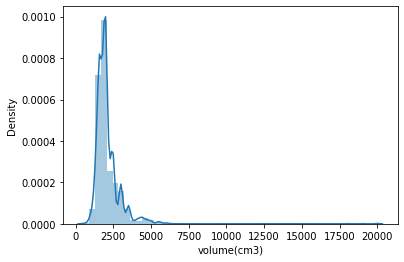

In [80]:
sns.distplot(car_data['volume(cm3)'])

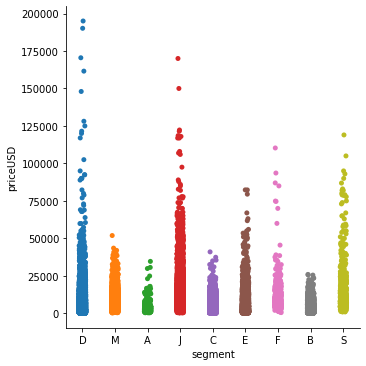

In [128]:
sns.catplot(x="segment", y="priceUSD",data=car_data)

#### FILL NAN VALUES

In [93]:
print('no of nan values in volume(cm3) feature -->',car_data['volume(cm3)'].isna().sum())
car_data['volume(cm3)'].fillna(2103.201676257193,inplace=True)


no of nan values in volume(cm3) feature --> 30


In [109]:
z=car_data['segment'].mode()
print('no of nan values in segment feature -->',car_data['segment'].isna().sum())
car_data['segment'].fillna(z[0],inplace=True)

no of nan values in segment feature --> 3755


In [121]:
z=car_data['drive_unit'].mode()[0]
print('no of nan values in drive_unit feature -->',car_data['drive_unit'].isna().sum())
car_data['drive_unit'].fillna(z,inplace=True)

no of nan values in drive_unit feature --> 1345


#### STATSTICAL TESTS

In [130]:
from scipy import stats

In [134]:
# T-Test

print(stats.ttest_ind(car_data['priceUSD'],car_data['volume(cm3)']))
print(stats.ttest_ind(car_data['priceUSD'],car_data['mileage(kilometers)']))


Ttest_indResult(statistic=126.97556625299858, pvalue=0.0)
Ttest_indResult(statistic=-148.98555715505074, pvalue=0.0)


In [163]:
car_data_cat=pd.DataFrame()
for i in car_data.select_dtypes(include='object').columns:
    label_encode=LabelEncoder()
    car_data_cat[i]=label_encode.fit_transform(car_data[i])
    

In [164]:
car_data['model'].value_counts()

passat      1532
5-seriya    1003
a6           896
golf         783
astra        698
            ... 
pulsar         1
1302           1
clio-rs        1
xg             1
bx             1
Name: model, Length: 991, dtype: int64

In [165]:
car_data_cont=car_data.select_dtypes(exclude='object').drop(columns=['Unnamed: 0'])

In [166]:
car_data_cont

,priceUSD,year,mileage(kilometers),volume(cm3)
0,565,1993,960015.0,2000.0
1,5550,2008,172000.0,1400.0
2,8300,2008,223000.0,2500.0
3,3300,2005,140000.0,1200.0
4,2450,2002,413000.0,2200.0
...,...,...,...,...
39995,12500,2008,214000.0,3700.0
39996,4754,2001,295000.0,2200.0
39997,4000,1999,0.0,2200.0
39998,1200,1996,250000.0,1300.0


In [221]:
car_data_=pd.concat([car_data_cont.drop(columns=['year']),car_data_cat],axis=1)

In [222]:
X=car_data_.drop(columns=['priceUSD'])
y=car_data_['priceUSD']

In [223]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [224]:
# without scaling the data
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(X_train,y_train)
pred=knr.predict(X_test)

In [225]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(y_test,pred),mean_squared_error(y_test,pred))

3738.1112121212122 46766027.317727275


In [226]:
# with scaling the data
scaler=StandardScaler()
scaler.fit(X_train)
X_tr=scaler.transform(X_train)
X_ts=scaler.transform(X_test)

In [227]:
knr=KNeighborsRegressor()
knr.fit(X_tr,y_train)
pred=knr.predict(X_ts)

In [228]:
print(mean_absolute_error(y_test,pred),mean_squared_error(y_test,pred))

2675.586863636363 34384890.03148182


In [229]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train,y_train)
pred=linear.predict(X_test)

In [230]:
print(mean_absolute_error(y_test,pred),mean_squared_error(y_test,pred))

4104.654754520462 54828991.82445712


In [231]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=10.0)
ridge.fit(X_train,y_train)
pred=ridge.predict(X_test)
print(mean_absolute_error(y_test,pred),mean_squared_error(y_test,pred))

4104.438400860006 54829199.16295456


In [232]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train,y_train)
pred=lasso.predict(X_test)
print(mean_absolute_error(y_test,pred),mean_squared_error(y_test,pred))

4104.368443822923 54829139.141033255


In [233]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')
svr.fit(X_tr,y_train)
pred=svr.predict(X_ts)

In [234]:
print(mean_absolute_error(y_test,pred),mean_squared_error(y_test,pred))

3901.6305703352086 59943593.060330756


In [195]:
svr=SVR()
svr.fit(X_train,y_train)
pred=svr.predict(X_test)

In [196]:
print(mean_absolute_error(y_test,pred),mean_squared_error(y_test,pred))

4705.702388275908 75172590.48455845


In [220]:
from sklearn.ensemble import RandomForestRegressor
rand_forest=RandomForestRegressor()
rand_forest.fit(X_train,y_train)
pred=rand_forest.predict(X_test)
print(mean_absolute_error(y_test,pred),mean_squared_error(y_test,pred))

1244.0054262824676 14006718.297828456


In [237]:
np.version.version

'1.18.0'